In [1]:
###########import packages##########
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import xgboost as xgb
import lightgbm
import catboost
from sklearn.model_selection import GridSearchCV
from xgboost import plot_importance
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import ensemble
from sklearn.tree import ExtraTreeRegressor
from sklearn import svm
from sklearn import neighbors
from sklearn import tree
import shap
import joblib
from sklearn.metrics import r2_score
%matplotlib inline
###########wrapping root mean square error for later calls##########
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())
###########loading data##########
fdata=pd.read_csv('finaldatabase.csv',encoding="utf-8")
raw_data=fdata.loc[:,[                     
    'xN2a_in0',#0
    'RH_CC',#1
    'dela_CH (mm)',#2
    'dela_M (um)',#3
    'dela_GDL (um)',#4
    'p_A (atm)',#5
    'T_cc (K)',#6
    'E cell (V)',#7
    'current',#8
    'fyN2',#9
                        ]]
###########train test splitting##########
standardized_data = (raw_data-np.mean(raw_data,axis=0))/np.std(raw_data,axis=0)
raw_input=raw_data.iloc[:,0:8]
raw_output=raw_data.iloc[:,8]
###########fix random seed for reproducability##########
seed=1
X_train, X_test, y_train, y_test = train_test_split(raw_input, raw_output, test_size=.15,random_state=seed)
y_test_values=y_test.values.astype(np.float32)


In [31]:
np.std(raw_data,axis=0)

xN2a_in0         2.020225e-01
RH_CC            3.053735e-01
dela_CH (mm)     6.812741e-01
dela_M (um)      9.198951e+01
dela_GDL (um)    1.103519e+02
p_A (atm)        1.706417e+00
T_cc (K)         9.709572e+00
E cell (V)       1.870136e-01
current          5.240198e-01
fyN2             1.171220e-15
dtype: float64

Trying to unpickle estimator DecisionTreeRegressor from version 0.23.2 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.
Trying to unpickle estimator AdaBoostRegressor from version 0.23.2 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.


可决系数 r2_score_current:  0.9300711907649793
方差 rmse_val： 0.1307025012638749


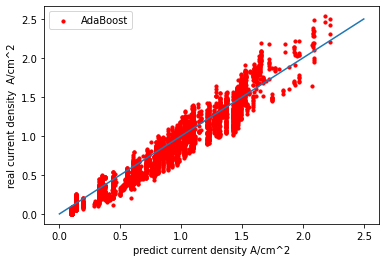

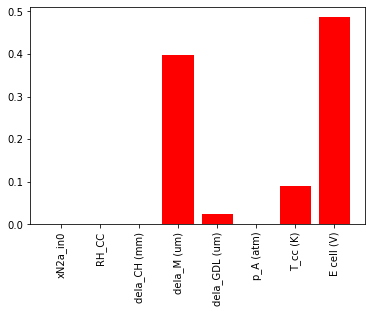

[0.         0.00130073 0.         0.39758156 0.02512944 0.
 0.08972824 0.48626002]


In [2]:
ada_model=joblib.load('ada_model')
algorithm_name='AdaBoost'
result = ada_model.predict(X_test)
x_prediction=result
y_real=y_test_values
x_prediction_series=pd.Series(x_prediction)
y_real_series=pd.Series(y_real)
###########evaluating the regression quality##########

rmse_val= rmse(x_prediction,y_real)
r2_score_current=r2_score(x_prediction,y_real)
print('可决系数 r2_score_current: ',r2_score_current)
print('方差 rmse_val：',rmse_val)

###########generating a figure##########
x_y_x=np.arange(0,2.6,0.1)
x_y_y=np.arange(0,2.6,0.1)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x_prediction,y_real,color='red',s=10,label=algorithm_name)
ax.plot(x_y_x,x_y_y)
plt.legend()
plt.xlabel(u"predict current density A/cm^2")
plt.ylabel(u"real current density  A/cm^2")
plt.savefig('%s CurrentdensityRegression.jpg' %algorithm_name,bbox_inches = 'tight')
plt.show()
name_list=list(X_test)
plt.bar(range(len(ada_model.feature_importances_)), ada_model.feature_importances_,color='red',tick_label=name_list)
plt.xticks(rotation=90)
plt.savefig('%s FeatureImportance.jpg' %algorithm_name,bbox_inches = 'tight')
plt.show()
print(ada_model.feature_importances_)




可决系数 r2_score_current:  0.9997293163060066
方差 rmse_val： 0.008653653717981404


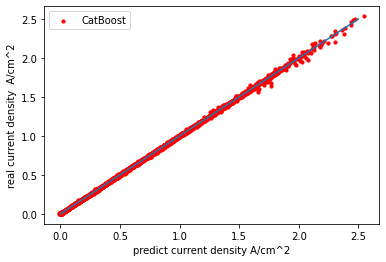

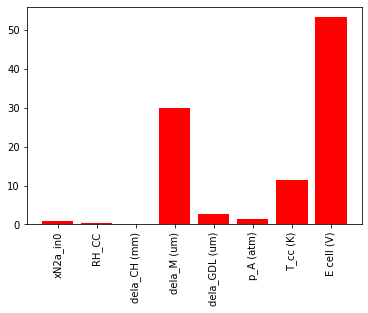

[ 0.82917392  0.40153083  0.10694777 29.87953728  2.65776576  1.45566901
 11.42661193 53.2427635 ]


In [3]:
cat_model=joblib.load('cat_model')
algorithm_name='CatBoost'
result = cat_model.predict(X_test)
x_prediction=result
y_real=y_test_values
x_prediction_series=pd.Series(x_prediction)
y_real_series=pd.Series(y_real)
###########evaluating the regression quality##########

rmse_val= rmse(x_prediction,y_real)
r2_score_current=r2_score(x_prediction,y_real)
print('可决系数 r2_score_current: ',r2_score_current)
print('方差 rmse_val：',rmse_val)

###########generating a figure##########
x_y_x=np.arange(0,2.6,0.1)
x_y_y=np.arange(0,2.6,0.1)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x_prediction,y_real,color='red',s=10,label=algorithm_name)
ax.plot(x_y_x,x_y_y)
plt.legend()
plt.xlabel(u"predict current density A/cm^2")
plt.ylabel(u"real current density  A/cm^2")
plt.savefig('%s CurrentdensityRegression.jpg' %algorithm_name,bbox_inches = 'tight')
plt.show()
name_list=list(X_test)
plt.bar(range(len(cat_model.feature_importances_)), cat_model.feature_importances_,color='red',tick_label=name_list)
plt.xticks(rotation=90)
plt.savefig('%s FeatureImportance.jpg' %algorithm_name,bbox_inches = 'tight')
plt.show()
print(cat_model.feature_importances_)




Trying to unpickle estimator DecisionTreeRegressor from version 0.23.2 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.


可决系数 r2_score_current:  0.998993259877925
方差 rmse_val： 0.01668647897474396


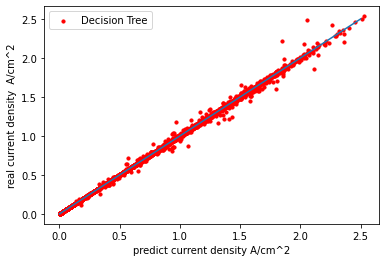

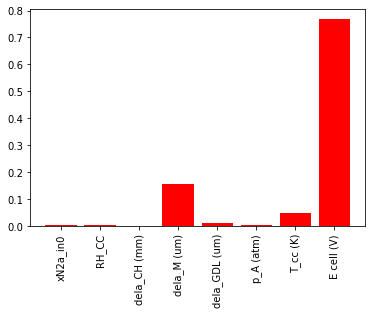

[4.05456013e-03 3.52196391e-03 4.41597136e-04 1.56669112e-01
 1.14225766e-02 6.96782724e-03 4.96705751e-02 7.67251788e-01]


In [4]:
dt_model=joblib.load('dt_model')
algorithm_name='Decision Tree'
result = dt_model.predict(X_test)
x_prediction=result
y_real=y_test_values
x_prediction_series=pd.Series(x_prediction)
y_real_series=pd.Series(y_real)
###########evaluating the regression quality##########

rmse_val= rmse(x_prediction,y_real)
r2_score_current=r2_score(x_prediction,y_real)
print('可决系数 r2_score_current: ',r2_score_current)
print('方差 rmse_val：',rmse_val)

###########generating a figure##########
x_y_x=np.arange(0,2.6,0.1)
x_y_y=np.arange(0,2.6,0.1)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x_prediction,y_real,color='red',s=10,label=algorithm_name)
ax.plot(x_y_x,x_y_y)
plt.legend()
plt.xlabel(u"predict current density A/cm^2")
plt.ylabel(u"real current density  A/cm^2")
plt.savefig('%s CurrentdensityRegression.jpg' %algorithm_name,bbox_inches = 'tight')
plt.show()
name_list=list(X_test)
plt.bar(range(len(dt_model.feature_importances_)), dt_model.feature_importances_,color='red',tick_label=name_list)
plt.xticks(rotation=90)
plt.savefig('%s FeatureImportance.jpg' %algorithm_name,bbox_inches = 'tight')
plt.show()
print(dt_model.feature_importances_)




可决系数 r2_score_current:  0.998993259877925
方差 rmse_val： 0.01668647897474396


Trying to unpickle estimator ExtraTreeRegressor from version 0.23.2 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.


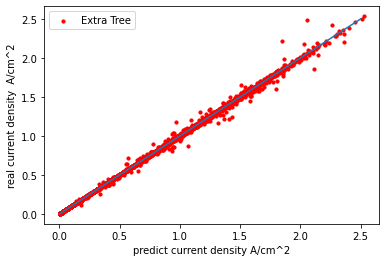

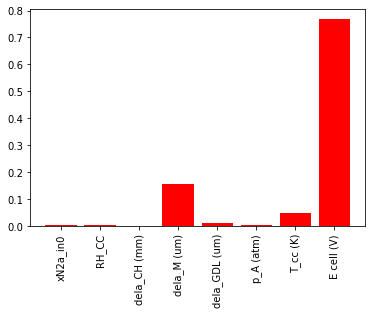

[4.05456013e-03 3.52196391e-03 4.41597136e-04 1.56669112e-01
 1.14225766e-02 6.96782724e-03 4.96705751e-02 7.67251788e-01]


In [5]:
et_model=joblib.load('et_model')
algorithm_name='Extra Tree'
result = et_model.predict(X_test)
x_prediction=result
y_real=y_test_values
x_prediction_series=pd.Series(x_prediction)
y_real_series=pd.Series(y_real)
###########evaluating the regression quality##########

rmse_val= rmse(x_prediction,y_real)
r2_score_current=r2_score(x_prediction,y_real)
print('可决系数 r2_score_current: ',r2_score_current)
print('方差 rmse_val：',rmse_val)

###########generating a figure##########
x_y_x=np.arange(0,2.6,0.1)
x_y_y=np.arange(0,2.6,0.1)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x_prediction,y_real,color='red',s=10,label=algorithm_name)
ax.plot(x_y_x,x_y_y)
plt.legend()
plt.xlabel(u"predict current density A/cm^2")
plt.ylabel(u"real current density  A/cm^2")
plt.savefig('%s CurrentdensityRegression.jpg' %algorithm_name,bbox_inches = 'tight')
plt.show()
name_list=list(X_test)
plt.bar(range(len(et_model.feature_importances_)), et_model.feature_importances_,color='red',tick_label=name_list)
plt.xticks(rotation=90)
plt.savefig('%s FeatureImportance.jpg' %algorithm_name,bbox_inches = 'tight')
plt.show()
print(et_model.feature_importances_)




可决系数 r2_score_current:  0.9929249374038824
方差 rmse_val： 0.04367934787197502


Trying to unpickle estimator DummyRegressor from version 0.23.2 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.
Trying to unpickle estimator DecisionTreeRegressor from version 0.23.2 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.
Trying to unpickle estimator GradientBoostingRegressor from version 0.23.2 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.


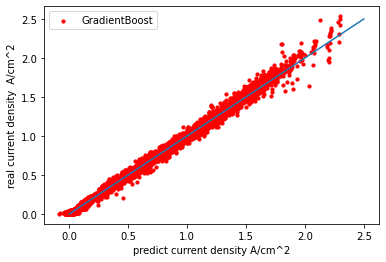

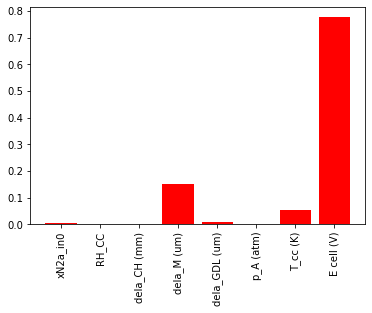

[3.69749254e-03 5.12583067e-04 7.28515196e-05 1.51876787e-01
 9.15884117e-03 2.63416828e-03 5.52623766e-02 7.76784900e-01]


In [6]:
gdb_model=joblib.load('gdb_model')
algorithm_name='GradientBoost'
result = gdb_model.predict(X_test)
x_prediction=result
y_real=y_test_values
x_prediction_series=pd.Series(x_prediction)
y_real_series=pd.Series(y_real)
###########evaluating the regression quality##########

rmse_val= rmse(x_prediction,y_real)
r2_score_current=r2_score(x_prediction,y_real)
print('可决系数 r2_score_current: ',r2_score_current)
print('方差 rmse_val：',rmse_val)

###########generating a figure##########
x_y_x=np.arange(0,2.6,0.1)
x_y_y=np.arange(0,2.6,0.1)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x_prediction,y_real,color='red',s=10,label=algorithm_name)
ax.plot(x_y_x,x_y_y)
plt.legend()
plt.xlabel(u"predict current density A/cm^2")
plt.ylabel(u"real current density  A/cm^2")
plt.savefig('%s CurrentdensityRegression.jpg' %algorithm_name,bbox_inches = 'tight')
plt.show()
name_list=list(X_test)
plt.bar(range(len(gdb_model.feature_importances_)), gdb_model.feature_importances_,color='red',tick_label=name_list)
plt.xticks(rotation=90)
plt.savefig('%s FeatureImportance.jpg' %algorithm_name,bbox_inches = 'tight')
plt.show()
print(gdb_model.feature_importances_)




可决系数 r2_score_current:  0.999357200129039
方差 rmse_val： 0.013332966993821211


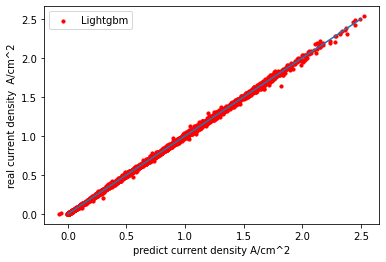

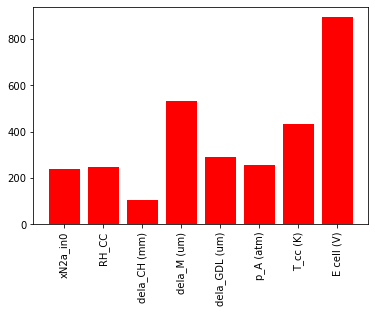

[238 249 106 532 290 257 435 893]


In [7]:
lgb_model=joblib.load('lgb_model')
algorithm_name='Lightgbm'
result = lgb_model.predict(X_test)
x_prediction=result
y_real=y_test_values
x_prediction_series=pd.Series(x_prediction)
y_real_series=pd.Series(y_real)
###########evaluating the regression quality##########

rmse_val= rmse(x_prediction,y_real)
r2_score_current=r2_score(x_prediction,y_real)
print('可决系数 r2_score_current: ',r2_score_current)
print('方差 rmse_val：',rmse_val)

###########generating a figure##########
x_y_x=np.arange(0,2.6,0.1)
x_y_y=np.arange(0,2.6,0.1)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x_prediction,y_real,color='red',s=10,label=algorithm_name)
ax.plot(x_y_x,x_y_y)
plt.legend()
plt.xlabel(u"predict current density A/cm^2")
plt.ylabel(u"real current density  A/cm^2")
plt.savefig('%s CurrentdensityRegression.jpg' %algorithm_name,bbox_inches = 'tight')
plt.show()
name_list=list(X_test)
plt.bar(range(len(lgb_model.feature_importances_)), lgb_model.feature_importances_,color='red',tick_label=name_list)
plt.xticks(rotation=90)
plt.savefig('%s FeatureImportance.jpg' %algorithm_name,bbox_inches = 'tight')
plt.show()
print(lgb_model.feature_importances_)




Trying to unpickle estimator DecisionTreeRegressor from version 0.23.2 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.
Trying to unpickle estimator RandomForestRegressor from version 0.23.2 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.


可决系数 r2_score_current:  0.9993401672897111
方差 rmse_val： 0.013509884691481695


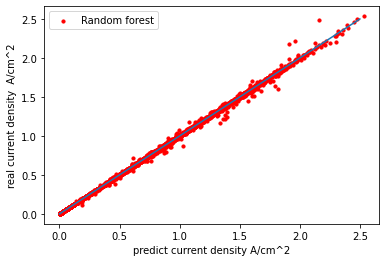

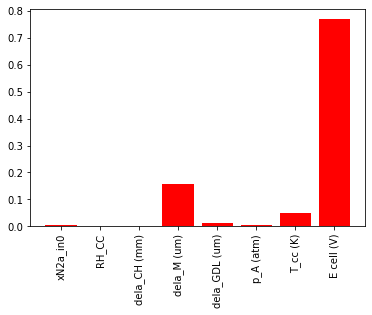

[4.26546091e-03 2.51963821e-03 4.85854977e-04 1.55999121e-01
 1.16880713e-02 6.56796693e-03 5.07614661e-02 7.67712420e-01]


In [8]:
rf_model=joblib.load('rf_model')
algorithm_name='Random forest'
result = rf_model.predict(X_test)
x_prediction=result
y_real=y_test_values
x_prediction_series=pd.Series(x_prediction)
y_real_series=pd.Series(y_real)
###########evaluating the regression quality##########

rmse_val= rmse(x_prediction,y_real)
r2_score_current=r2_score(x_prediction,y_real)
print('可决系数 r2_score_current: ',r2_score_current)
print('方差 rmse_val：',rmse_val)

###########generating a figure##########
x_y_x=np.arange(0,2.6,0.1)
x_y_y=np.arange(0,2.6,0.1)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x_prediction,y_real,color='red',s=10,label=algorithm_name)
ax.plot(x_y_x,x_y_y)
plt.legend()
plt.xlabel(u"predict current density A/cm^2")
plt.ylabel(u"real current density  A/cm^2")
plt.savefig('%s CurrentdensityRegression.jpg' %algorithm_name,bbox_inches = 'tight')
plt.show()
name_list=list(X_test)
plt.bar(range(len(rf_model.feature_importances_)), rf_model.feature_importances_,color='red',tick_label=name_list)
plt.xticks(rotation=90)
plt.savefig('%s FeatureImportance.jpg' %algorithm_name,bbox_inches = 'tight')
plt.show()
print(rf_model.feature_importances_)




可决系数 r2_score_current:  0.9998714502566558
方差 rmse_val： 0.0059633697


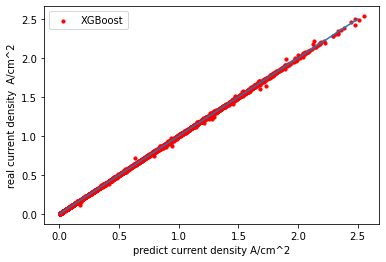

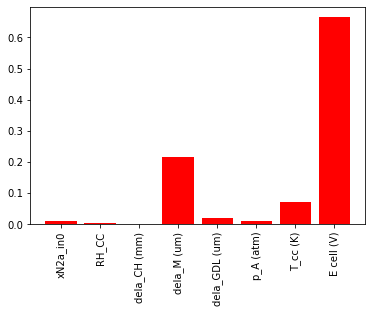

[0.00995405 0.00314745 0.00175955 0.21676786 0.01925483 0.01157039
 0.07296789 0.66457796]


In [9]:
xgb_model=joblib.load('xgb_model')
algorithm_name='XGBoost'
result = xgb_model.predict(X_test)
x_prediction=result
y_real=y_test_values
x_prediction_series=pd.Series(x_prediction)
y_real_series=pd.Series(y_real)
###########evaluating the regression quality##########

rmse_val= rmse(x_prediction,y_real)
r2_score_current=r2_score(x_prediction,y_real)
print('可决系数 r2_score_current: ',r2_score_current)
print('方差 rmse_val：',rmse_val)

###########generating a figure##########
x_y_x=np.arange(0,2.6,0.1)
x_y_y=np.arange(0,2.6,0.1)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x_prediction,y_real,color='red',s=10,label=algorithm_name)
ax.plot(x_y_x,x_y_y)
plt.legend()
plt.xlabel(u"predict current density A/cm^2")
plt.ylabel(u"real current density  A/cm^2")
plt.savefig('%s CurrentdensityRegression.jpg' %algorithm_name,bbox_inches = 'tight')
plt.show()
name_list=list(X_test)
plt.bar(range(len(xgb_model.feature_importances_)), xgb_model.feature_importances_,color='red',tick_label=name_list)
plt.xticks(rotation=90)
plt.savefig('%s FeatureImportance.jpg' %algorithm_name,bbox_inches = 'tight')
plt.show()
print(xgb_model.feature_importances_)


